<a href="https://colab.research.google.com/github/divyansh-ag-03/AAIES/blob/main/Assignment6_triples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<b>The Problem Statement</b>:

Form triples based on the following paragraph:

"Alice is enrolled in Computer Science 101. Bob is enrolled in Physics 201. Charlie is enrolled in Mathematics 301. Computer Science 101 is taught by Professor Smith. Physics 201 is taught by Professor Johnson. Mathematics 301 is taught by Professor Brown."

Use the above to paragraph extract triples and build a complete graph representing the relationships between students, courses, and instructors in a university setting.







## The Code

#Divyansh Agrawal - 21CSU214

### Imports

In [18]:
!pip install pyvis
!pip install pyvis==0.1.9
!pip install nxpd

In [19]:
### NLTK libraries for triples extraction
from nltk.tokenize import word_tokenize
from nltk import pos_tag

### To plot a networkx graph in pyvis
import networkx as nx
import matplotlib.pyplot as plt
from pyvis.network import Network
from IPython.display import HTML
from IPython.display import display,IFrame

In [20]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

### Definition of the Triples

In [21]:
# Manually define the triples from the paragraph in the subject predicate and object format as a list of tuples
triples = []

### Graph Building using Networkx

In [22]:
# Function to build a NetworkX graph from extracted triples
def build_networkx_graph(triples):
    """
    Builds a NetworkX graph from a list of subject-predicate-object triples.

    Args:
        triples (list): A list of extracted triples, each represented as a tuple (subject, predicate, object).

    Returns:
        networkx.Graph: A NetworkX graph representing relationships between students, courses, and instructors.
    """
    # TO-DO: Implement the code to build a NetworkX graph from the triples
    # Initialize an empty NetworkX graph
    G = nx.Graph()
    # Iterate through the triples
    # Add nodes with node types (student, course, instructor)
    # Add edges with relationship types (enrolled in, taught by)
    for triple in triples:
        subject, predicate, obj = triple
        G.add_node(subject, type='student' if 'student' in subject.lower() else 'course' if 'course' in subject.lower() else 'instructor')
        G.add_node(obj, type='student' if 'student' in obj.lower() else 'course' if 'course' in obj.lower() else 'instructor')
        G.add_edge(subject, obj, relation=predicate)
    # Return the NetworkX graph
    return G

### Graph Visualize using Matplotlib

In [23]:
# Function to save the graph as "university_relationship_graph.html" using PyVis
def save_graph_pyvis(graph):
    """
    Visualizes a NetworkX graph using PyVis and saves it as an HTML file.

    Args:
        graph (networkx.Graph): The NetworkX graph to be visualized.

    Returns:
        None
    """
    # TO-DO: Implement the code to visualize the graph using PyVis
    # Create an empty PyVis Network object
    pos = nx.spring_layout(graph, seed=42)
    # Add nodes and edges to the PyVis graph
    node_colors = [get_node_color(graph.nodes[node]['type']) for node in graph.nodes]
    edge_colors = [get_edge_color(graph.edges[edge]['relation']) for edge in graph.edges]

    nx.draw(graph, pos, with_labels=True, node_color=node_colors, edge_color=edge_colors, font_size=10, font_weight="bold", node_size=500)
    plt.show()

### Main function to solve the problem

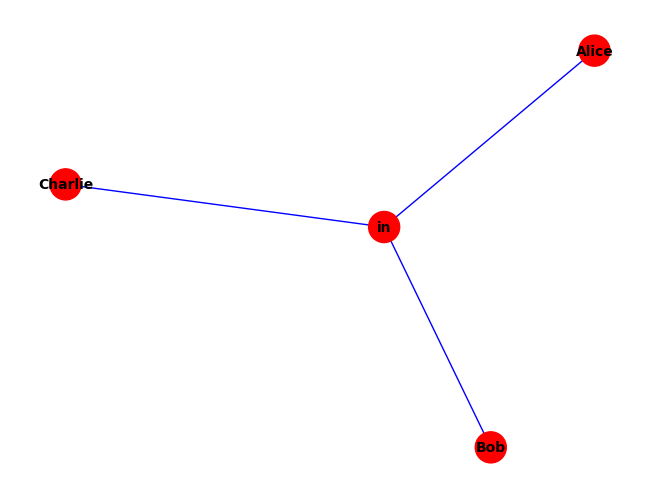

In [27]:
def get_node_color(node):
    node_label = node.lower()
    if 'student' in node_label:
        return 'blue'
    elif 'course' in node_label:
        return 'green'
    elif 'instructor' in node_label:
        return 'red'

def get_edge_color(relation):
    if relation == 'enrolled in':
        return 'blue'
    elif relation == 'taught by':
        return 'red'
# Given paragraph
paragraph = "Alice is enrolled in Computer Science 101. Bob is enrolled in Physics 201. Charlie is enrolled in Mathematics 301. Computer Science 101 is taught by Professor Smith. Physics 201 is taught by Professor Johnson. Mathematics 301 is taught by Professor Brown."

# Function to extract triples from the paragraph using NLTK
def extract_triples_nltk(paragraph):
    triples = []
    sentences = nltk.sent_tokenize(paragraph)

    for sentence in sentences:
        words = word_tokenize(sentence)
        tagged_words = pos_tag(words)

        student = None
        course = None
        instructor = None

        for i in range(len(tagged_words)):
            if tagged_words[i][0].istitle():
                if i + 3 < len(tagged_words) and tagged_words[i + 1][0] == 'is' and tagged_words[i + 2][0] == 'enrolled':
                    student = tagged_words[i][0]
                    course = tagged_words[i + 3][0]
                    triples.append((student, 'enrolled in', course))
                elif i + 4 < len(tagged_words) and tagged_words[i + 1][0] == 'is' and tagged_words[i + 2][0] == 'taught' and tagged_words[i + 3][0] == 'by':
                    course = tagged_words[i][0]
                    instructor = tagged_words[i + 4][0]
                    triples.append((course, 'taught by', instructor))

    return triples

# Extract triples using NLTK
triples = extract_triples_nltk(paragraph)

# Build a graph using the manually defined triples
graph = build_networkx_graph(triples)

# Visualize the graph
save_graph_pyvis(graph)